In [22]:
import numpy as np
import matplotlib.pyplot as plt
from load_datasets import load_dataset

In [23]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [24]:
def fit( w, w0, X, y, max_iter, lr, print_cost = False , tolerance = 1e-15, val_freq = 100):
    
    costs = []
    # Add extra feature (x[0] = 1) for bias in linear regression
    #X = self.__add_intercept(X)
    n_features, n_objects = X.shape

    # Initialize randomly
    w = np.random.random(n_features)
    w = w.reshape(X.shape[0], 1)
    w0 = np.random.random(1)

    # Iterative gradient descent
    print('X shape:{}', format(X.shape))
    print('Y shape:{}', format(y.shape))
    print('w shape:{}', format(w.shape))
    print('w0 shape:{}', format(w0.shape))
    z = sigmoid(np.dot(w.T, X) +w0)
    print('z shape:{}', format(z.shape))

    for i in range(max_iter):

        m = X.shape[1]
        h = logit(w.T, X) + w0
        z = sigmoid(h)

        grad = (1. / m) * logit(X, (z - y).T)
        grad0 = (1. / m) * np.sum(z - y, axis = 1)
        
        w -= lr * grad
        w0 -= lr * grad0

        #terminater proc
        if (np.linalg.norm(lr * grad) < tolerance):
            print('Converged in {} iterations!'.format(i))
            break

        if i % val_freq == 0:
            # Clip values for numeric stability in logarithm
            p = np.clip(z, 1e-10, 1 - 1e-10)
            
            # Compute log loss and accuracy
            ls = np.squeeze((-1. / X.shape[1]) * np.sum((y * np.log(z) + (1 - y) * np.log(1 - z)), axis = 1))
            acc = np.mean((p >= 0.5) == y)
            costs.append(ls)
            
            print('Iteration {}: Loss = {}. Accuracy = {}'.format(i, ls, acc))

    return w, w0, costs


def predict(w, w0, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector 'A' predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + w0)
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = np.where(A[0, i] > 0.5, 1, 0)
        ### END CODE HERE ###
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w_init = np.zeros(shape=(X_train.shape[0], 1), dtype=np.float32)
    w0_init = 0
    
    # Gradient descent (≈ 1 line of code)   
    w, w0, costs = fit(w_init, w0_init, X_train, Y_train, num_iterations, learning_rate, print_cost)

    Y_prediction_test = predict(w, w0, X_test)
    Y_prediction_train = predict(w, w0, X_train)

    return Y_prediction_test, Y_prediction_train, costs #Y_prediction_test, Y_prediction_train, costs

In [25]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [26]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

In [27]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], - 1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], - 1).T
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

len(train_set_x)

12288

In [28]:
y_predict_test, y_predict_train, costs = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

X shape:{} (12288, 209)
Y shape:{} (209,)
w shape:{} (12288, 1)
w0 shape:{} (1,)
z shape:{} (1, 209)
Iteration 0: Loss = nan. Accuracy = 0.3444976076555024


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply


Iteration 100: Loss = nan. Accuracy = 0.3444976076555024
Iteration 200: Loss = nan. Accuracy = 0.3444976076555024
Iteration 300: Loss = nan. Accuracy = 0.3444976076555024
Iteration 400: Loss = nan. Accuracy = 0.6267942583732058
Iteration 500: Loss = nan. Accuracy = 0.6411483253588517
Iteration 600: Loss = nan. Accuracy = 0.6555023923444976
Iteration 700: Loss = nan. Accuracy = 0.6746411483253588
Iteration 800: Loss = nan. Accuracy = 0.7272727272727273
Iteration 900: Loss = inf. Accuracy = 0.7272727272727273
Iteration 1000: Loss = inf. Accuracy = 0.7511961722488039
Iteration 1100: Loss = 1.557915781975038. Accuracy = 0.7799043062200957
Iteration 1200: Loss = 1.0994501845698899. Accuracy = 0.7799043062200957
Iteration 1300: Loss = 0.8391039031903749. Accuracy = 0.8181818181818182
Iteration 1400: Loss = 0.7088247877632669. Accuracy = 0.8229665071770335
Iteration 1500: Loss = 0.6088535106664379. Accuracy = 0.8277511961722488
Iteration 1600: Loss = 0.5259031866938034. Accuracy = 0.842105263

In [29]:
y_predict_test.astype(int)

array([[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0]])

In [30]:
test_set_y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0], dtype=int64)

y = 0, you predicted that it is a 'non-cat' picture.


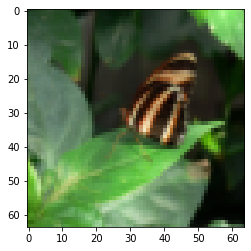

In [31]:
index = 5
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ('y = ' + str(test_set_y[index]) + ', you predicted that it is a \'' + classes[int(y_predict_test[0, index])] +  '\' picture.')